In [6]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

In [7]:
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

In [8]:
shivam_cosmology = {
    
#     H0 = 67.74
#     Om0 = 0.315
#     Ob0 = 0.04860
#     sigma8 = 0.8159
#     ns = 0.9667
#     Onu0=0.0
#     w=-1.0    

     'h' : 0.6774,
     'Omega_b' : 0.04860,
     'Omega_cdm' : 0.315-0.04860,
     'sigma8' : 0.8159,
     'n_s' : 0.9667,
     'N_ncdm': 1,
     'N_ur': 2.0328,
     'm_ncdm': 0.0

}


#Here is the bestfit (theta, gammat) from Georgios, for bin 1/3 with bestfit parameters:
#these are 200c masses (-> typo in the table legend of table D1 https://arxiv.org/pdf/2106.08438.pdf)
#log10(Mmin)=11.97, log10(M1)=13.51, sigma_logM=0.26, alpha=1.88, fcen=0.12, log10(Mstar)=11.18, csat/cdm=1.09, m=-3.63e-2, Delta z_l=0.00, Delta z_s=1.07e-3 

0.9999999999999999
0.009622278143990333


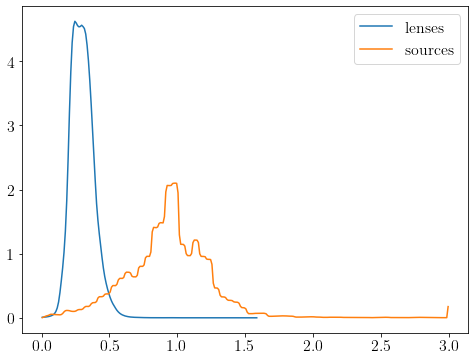

In [4]:
z , nz_lenses = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/nz_lens_bin1.txt',unpack=True)
plt.plot(z,nz_lenses,label='lenses')
print(np.trapz(nz_lenses,z))
z , nz_sources = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/nz_source_bin4.txt',unpack=True)
plt.plot(z,nz_sources/np.trapz(nz_sources,z),label='sources')
print(np.trapz(nz_sources,z))
plt.legend()
# np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/nz_source_bin4_norm.txt',np.c_[z,nz_sources/np.trapz(nz_sources,z)])

In [78]:
z_for_pk_hm = 0.199045
M = Class()
M.set(shivam_cosmology)
M.set({
'output':'dndlnM,gamma_gal_gallens_1h,gamma_gal_gallens_2h,lens_lens_2h,gal_gal_2h,gal_gal_1h,pk_gg_at_z_1h,pk_gg_at_z_2h',
'ell_max' : 5e5,
'ell_min' : 2,
'dlogell':0.07,
    
'mass function':'T08M200c',

'M_min':1e11,
'M_max':1e15,
'mass_epsrel': 1e-8,
'mass_epsabs': 1e-60,
    
'z_min':1e-5,
'z_max': 2.,
    
'delta for galaxies':'200c',
'delta for matter density':'200c',
    
'concentration parameter':'D08',
    
#     logMmin = 11.57
#     sig_logM = 0.17
#     logM1 = 12.75
#     alpha_g = 0.99
#     fcen = 0.9
#     rmax_r200c = 1.0 # max gal /r200c
#     rmax_rvir = 1.0 # 
#     rsg_rs = 1.0  # concentration galaxies same as nfw
    
    
'M_min_HOD':10.**11.57,
'M1_prime_HOD':10.**12.75,
    
'sigma_log10M_HOD':0.17,
'alpha_s_HOD':0.99,
    
'x_out_truncated_nfw_profile_satellite_galaxies':1.,
'csat_over_cdm' : 1.,

'f_cen_HOD': 1.,
    

    
    
'Delta_z_lens':0.00,
'Delta_z_source':0.00,
    
'galaxy_sample' : 'custom',
'full_path_to_dndz_gal' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/nz_lens_bin1.txt', # lens galaxies
'full_path_to_source_dndz_gal' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/nz_source_bin4.txt', # source galaxies

'N_samp_fftw':1000, #precision parameter for the bessel transform to theta space
'l_min_samp_fftw' : 1e-12,
'l_max_samp_fftw' : 1e12,
    
'hm_consistency' : 0,
'ndim_redshifts': 200,
'ndim_masses': 500,
    
"dlnk_for_pk_hm" : 0.1,
"z_for_pk_hm" : z_for_pk_hm,
"z_pk" : z_for_pk_hm ,
"k_min_for_pk_hm" : 1e-3,
"k_max_for_pk_hm" : 5e1
# 'P_k_max_h/Mpc':8e2,
# 'k_max_for_pk_class_sz':5e2,
#'non linear':'halofit'
})
M.compute()

In [82]:
M.get_current_derived_parameters(['A_s'])

{'A_s': 2.008589e-09}

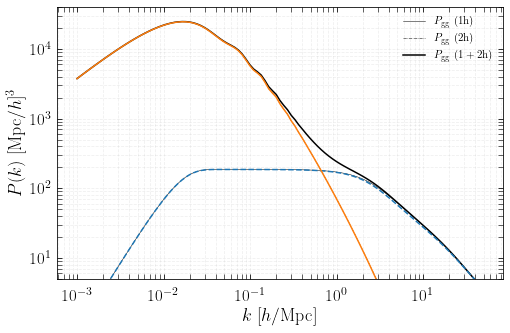

In [22]:
pk_gg_at_z_hm = M.pk_gg_at_z_hm()
k_arr = np.geomspace(2e-3,1e1,100)

label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax3) = plt.subplots(1,1,figsize=(8,5))

ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r"$P(k)$    $[\mathrm{Mpc}/h]^3$",size=title_size)
ax.set_xlabel(r"$k$   $[h/\mathrm{Mpc}]$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(5e0,4e4)
# ax.set_xlim(1e-2,1e1)

# ax.plot(k_arr/M.h(),pk_at_z_class_halofit(k_arr,z_for_pk_hm)*M.h()**3.,label='$P_\mathrm{mm}$ $\mathrm{Halofit}$',c='b',ls=':')
# ax.plot(k_arr/M.h(),M.get_mean_galaxy_bias_at_z(z_for_pk_hm)**2.*pk_at_z_class_halofit(k_arr,z_for_pk_hm)*M.h()**3.,label='$b_g^2 P_\mathrm{mm}$ $\mathrm{Halofit}$',ls='--',c='b')


ax.plot(pk_gg_at_z_hm['k'],pk_gg_at_z_hm['1h'],label = '$P_\mathrm{gg}$ $\mathrm{(1h)}$',c='k',ls='-',lw=0.5)
ax.plot(pk_gg_at_z_hm['k'],pk_gg_at_z_hm['2h'],label = '$P_\mathrm{gg}$ $\mathrm{(2h)}$',c='k',ls='-.',lw=0.5)
ax.plot(pk_gg_at_z_hm['k'],
        np.asarray(pk_gg_at_z_hm['1h'])+np.asarray(pk_gg_at_z_hm['2h']),
        label = '$P_\mathrm{gg}$ $\mathrm{(1+2h)}$',c='k',ls='-')

ax.legend(fontsize=11,ncol=1,frameon=False)

np.savetxt('/Users/boris/Desktop/class_sz_pks_gg_k_1h_2h_new.txt',
           np.c_[pk_gg_at_z_hm['k'],
                 pk_gg_at_z_hm['1h'],
                 pk_gg_at_z_hm['2h']])

k,pk1h,pk2h = np.loadtxt('/Users/boris/Desktop/class_sz_pks_gg_k_1h_2h.txt',unpack=True)
plt.plot(k,pk1h,ls='--')
plt.plot(k,pk2h)

In [23]:
pk_gg_at_z_hm['1h']

[0.8536437452626154,
 1.0421137500046105,
 1.2720519147670524,
 1.5525122043027542,
 1.8944909948000692,
 2.311326883067679,
 2.8191744053069114,
 3.4375610608831417,
 4.1900358649599,
 5.104914764599054,
 6.2161226602544115,
 7.564122063936673,
 9.196902620634187,
 11.170981150170435,
 13.55232507913771,
 16.417058942432174,
 19.851739497064308,
 23.95288600844611,
 28.825327333661722,
 34.57878224981031,
 41.32194343033964,
 49.15323205221598,
 58.147410756521374,
 68.33752148131495,
 79.69234310947405,
 92.0909667918753,
 105.29833247076925,
 118.94856914464526,
 132.5460517144969,
 145.49556925760373,
 157.17015230543228,
 167.01495782006995,
 174.66751004762082,
 180.05418950585153,
 183.4143096040857,
 185.22318808127676,
 186.0362596188871,
 186.3280149440806,
 186.4047386068215,
 186.41399712854593,
 186.40703192179885,
 186.39587426413615,
 186.38200968443937,
 186.3650659864784,
 186.34437448297004,
 186.31910761030557,
 186.28825521752265,
 186.25058489709537,
 186.204593465

In [24]:
M.get_ng_bar_at_z(0.199045)

0.014506099517228125

In [25]:
zhod = 0.2
Mhod = 10**11.301507
M_min = 10.**11.57
sigma_log10M = 0.17
fc = 1
nc = M.get_N_centrals(zhod,Mhod,M_min,sigma_log10M,fc)
print(nc)

0.012755778565666565


In [26]:
zhod = 0.2
Mhod = 10**13.01005
M_min = 10.**11.57
sigma_log10M = 0.17
fc = 1
nc = M.get_N_centrals(zhod,Mhod,M_min,sigma_log10M,fc)
print(nc)
alpha_s = 0.99
M1_prime = 10.**12.75
M.get_N_satellites(zhod,Mhod,nc,M_min,alpha_s,M1_prime)

1.0


1.7440154293558285

In [27]:
# TBD: compare with colossus

zhod = 0.199045
Mhod = np.geomspace(1e11,1e15,300)
dndm = 1./Mhod*np.vectorize(M.get_dndlnM_at_z_and_M)(zhod,Mhod)

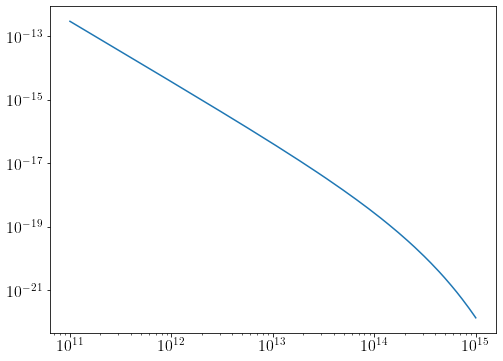

In [29]:
plt.plot(Mhod,dndm)
plt.loglog()

np.savetxt('/Users/boris/Desktop/class_sz_m_dndm.txt',
           np.c_[Mhod,
                 dndm])

In [14]:
cd = M.get_c200c_at_m_and_z_D08(Mhod,zhod)
cd

4.569442768580319

In [8]:
rd = M.get_r_delta_of_m_delta_at_z(200,10**13.01005,0.199045)
rd

0.3297357977686627

In [23]:
rd = M.get_r_delta_of_m_delta_at_z(200,Mhod,zhod)
cd = M.get_c200c_at_m_and_z_D08(Mhod,zhod)
kuk= 1e4
us = np.vectorize(M.get_truncated_nfw_profile_at_z_k_rd_cd_xout)(zhod,kuk,rd,cd,1)

In [24]:
us

array(1.53532952e-06)

In [28]:
gamma_t_thetas = np.asarray(M.gamma_ggamma()['thetas'])
gamma_t_1h = np.asarray(M.gamma_ggamma()['1h'])
gamma_t_2h = np.asarray(M.gamma_ggamma()['2h'])
m_gammat = 0. 

cl_g_gamma_ell = np.asarray(M.cl_ggamma()['ell'])
cl_g_gamma_1h = np.asarray(M.cl_ggamma()['1h'])
cl_g_gamma_2h = np.asarray(M.cl_ggamma()['2h'])



cl_g_g_ell = np.asarray(M.cl_gg()['ell'])
cl_g_g_1h = np.asarray(M.cl_gg()['1h'])
cl_g_g_2h = np.asarray(M.cl_gg()['2h'])

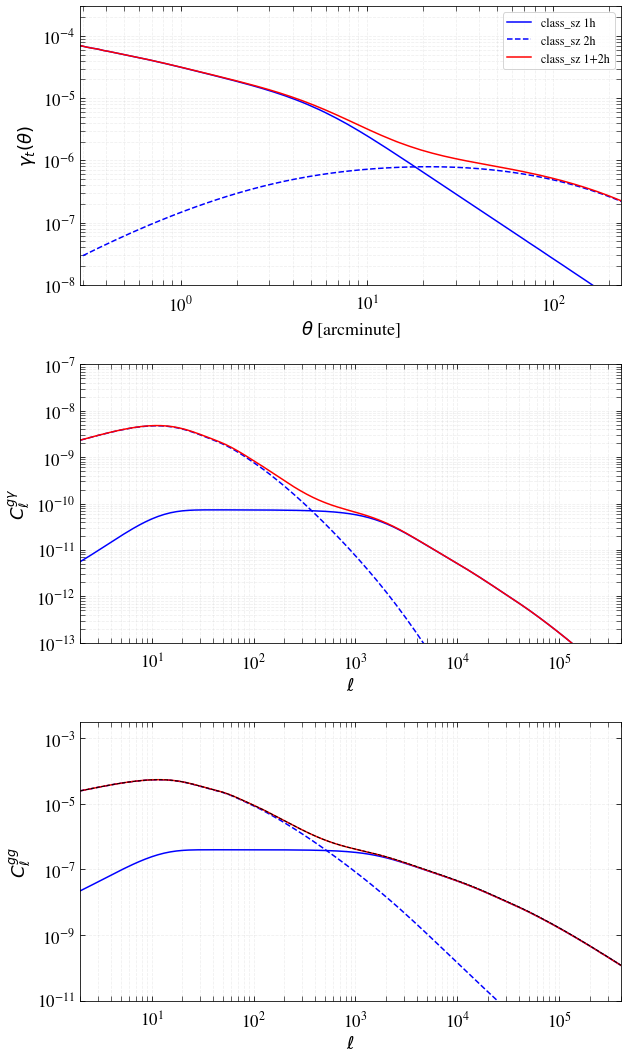

In [29]:
save_curves = 'yes'


label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(9,15))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r'$\theta$ [arcminute]',size=title_size)
ax.set_ylabel(r'$\gamma_t(\theta)$',size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-8,3e-4)
ax.set_xlim(2.9e-1,2.3e2)



ax.plot(gamma_t_thetas,(1.+m_gammat)*gamma_t_1h,label='class_sz 1h',c='b',ls='-')
ax.plot(gamma_t_thetas,(1.+m_gammat)*gamma_t_2h,label='class_sz 2h',c='b',ls='--')
ax.plot(gamma_t_thetas,(1.+m_gammat)*(gamma_t_2h+gamma_t_1h),label='class_sz 1+2h',c='r')
# th_z21, gammat_z21 = np.loadtxt('/Users/boris/Work/DES/gammat_1_3.txt',unpack=True)
# ax.plot(th_z21,gammat_z21,label='Zacharegkas et al 21 - data',marker='o',c='k',ls='None')
# th_z21, gammat_z21 = np.loadtxt('/Users/boris/Work/DES/gammat_1_3_bf.txt',unpack=True)
# ax.plot(th_z21,gammat_z21,label='Zacharegkas et al 21 - best-fit',ls='-',c='k')
if save_curves == 'yes':
    np.savetxt('/Users/boris/Desktop/class_sz_thetas_gammat1h_gammat2h_highprec_duffy.txt',
               np.c_[gamma_t_thetas,gamma_t_1h,gamma_t_2h])


ax.legend(loc=1,ncol = 1,frameon=True,fontsize=12)


ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$C_\ell^{g\gamma}$',size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-13,1e-7)
ax.set_xlim(2.,4e5)
fac = cl_g_gamma_ell*(cl_g_gamma_ell+1.)/2./np.pi
ax.plot(cl_g_gamma_ell,cl_g_gamma_1h/fac,label='class_sz 1h',c='b',ls='-')
ax.plot(cl_g_gamma_ell,cl_g_gamma_2h/fac,label='class_sz 2h',c='b',ls='--')
ax.plot(cl_g_gamma_ell,cl_g_gamma_1h/fac+cl_g_gamma_2h/fac,label='class_sz 1+2h',c='r')

if save_curves == 'yes':
    np.savetxt('/Users/boris/Desktop/class_sz_ells_clggamma1h_clggamma2h_highprec_duffy.txt',
               np.c_[cl_g_gamma_ell,cl_g_gamma_1h/fac,cl_g_gamma_2h/fac])


fig.tight_layout()



ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$C_\ell^{gg}$',size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-11,3e-3)
ax.set_xlim(2.,4e5)
fac = cl_g_g_ell*(cl_g_g_ell+1.)/2./np.pi
ax.plot(cl_g_g_ell,cl_g_g_1h/fac,label='class_sz 1h',c='b',ls='-')
ax.plot(cl_g_g_ell,cl_g_g_2h/fac,label='class_sz 2h',c='b',ls='--')
ax.plot(cl_g_g_ell,cl_g_g_1h/fac+cl_g_g_2h/fac,label='class_sz 1+2h',c='r')

if save_curves == 'yes':
    np.savetxt('/Users/boris/Desktop/class_sz_ells_clgg1h_clgg2h_highprec_duffy.txt',
               np.c_[cl_g_g_ell,cl_g_g_1h/fac,cl_g_g_2h/fac])
    
cl_g_g_ell,cl_g_g_1h_fac,cl_g_g_2h_fac = np.loadtxt('/Users/boris/Desktop/class_sz_ells_clgg1h_clgg2h_highprec.txt',
           unpack=True)

ax.plot(cl_g_g_ell,cl_g_g_1h_fac+cl_g_g_2h_fac,c='k',ls='--',lw=1)

fig.tight_layout()

#plt.savefig('name.pdf')

In [9]:
z= 0.199045
m200c=10**13.01005

kar = np.geomspace(1e-3,1e3,100)
rd = M.get_r_delta_of_m_delta_at_z(200,m200c,z)
cd = M.get_c200c_at_m_and_z_D08(m200c,z)
us = np.vectorize(M.get_truncated_nfw_profile_at_z_k_rd_cd_xout)(z,kar,rd,cd,1.)

In [10]:
print(rd)

0.3297357977686627


In [11]:
print(cd)

4.571152930977684


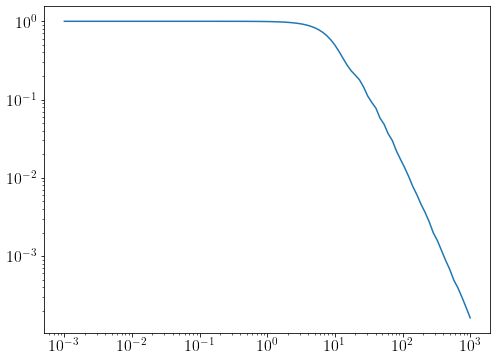

In [12]:
plt.plot(kar,us)
plt.xscale('log')
save_curves = 'yes'
if save_curves == 'yes':
    np.savetxt('/Users/boris/Desktop/class_sz_k_us_highk_duffy_new.txt',
               np.c_[kar,us])
plt.yscale('log')

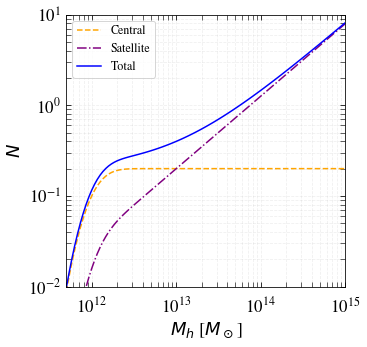

In [47]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r'$N$',size=title_size)
ax.set_xlabel(r'$M_h$ [$M_\odot$]',size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-2,1e1)
ax.set_xlim(5e11,1e15)
M_arr = np.geomspace(5e11,1e15,100)
get_N_centrals = np.vectorize(M.get_N_centrals)
Nc = get_N_centrals(0.,M_arr,1e12,0.25,0.2)
get_N_sats = np.vectorize(M.get_N_satellites)
Ns = get_N_sats(0.,M_arr,Nc,0.,0.8,1e13)
ax.plot(M_arr,Nc,ls='--',c='orange',label='Central')
ax.plot(M_arr,Ns,ls='-.',c='purple',label='Satellite')
ax.plot(M_arr,Ns+Nc,ls='-',c='b',label='Total')
ax.legend(loc=2,ncol = 1,frameon=True,fontsize=12)
#plt.savefig('HOD_fig1_2106.08438.pdf')

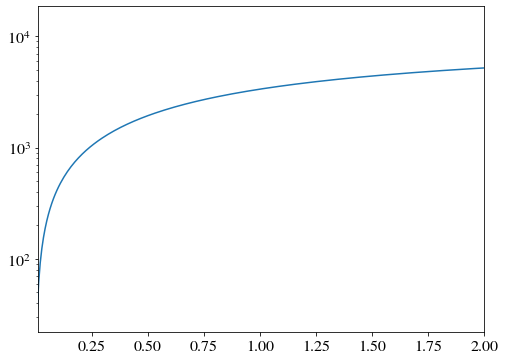

In [8]:
plt.plot(M.get_background()['z'],M.get_background()['ang.diam.dist.']*(1.+M.get_background()['z']))
plt.xlim(1e-2,2e0)
# plt.ylim(1e-2,2e0)
plt.yscale('log')

In [9]:
zp = 0.3 
lp =5e5
k = lp/(M.angular_distance(zp)*(1.+zp))
"%.5e"%(1./k)

'2.45946e-03'

In [10]:
(M.angular_distance(zp)*(1.+zp))

1229.732463340549

In [11]:
zp = 5.
(M.angular_distance(zp)*(1.+zp))

7729.189343534044

# HMF NO SPLINE

In [4]:
z_for_pk_hm = 0.199045
M = Class()
M.set(shivam_cosmology)
M.set({
'output':'dndlnM,gamma_gal_gallens_1h,gamma_gal_gallens_2h,lens_lens_2h,gal_gal_2h,gal_gal_1h,pk_gg_at_z_1h,pk_gg_at_z_2h',
'ell_max' : 5e5,
'ell_min' : 2,
'dlogell':0.07,
    
'mass function':'T08M200c',

'M_min':1e11,
'M_max':1e15,
'mass_epsrel': 1e-8,
'mass_epsabs': 1e-60,
    
'z_min':1e-5,
'z_max': 2.,
    
'delta for galaxies':'200c',
'delta for matter density':'200c',
    
'concentration parameter':'D08',
    
#     logMmin = 11.57
#     sig_logM = 0.17
#     logM1 = 12.75
#     alpha_g = 0.99
#     fcen = 0.9
#     rmax_r200c = 1.0 # max gal /r200c
#     rmax_rvir = 1.0 # 
#     rsg_rs = 1.0  # concentration galaxies same as nfw
    
    
'M_min_HOD':10.**11.57,
'M1_prime_HOD':10.**12.75,
    
'sigma_log10M_HOD':0.17,
'alpha_s_HOD':0.99,
    
'x_out_truncated_nfw_profile_satellite_galaxies':1.,
'csat_over_cdm' : 1.,

'f_cen_HOD': 1.,
    

    
    
'Delta_z_lens':0.00,
'Delta_z_source':0.00,
    
'galaxy_sample' : 'custom',
'full_path_to_dndz_gal' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/nz_lens_bin1.txt', # lens galaxies
'full_path_to_source_dndz_gal' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/nz_source_bin4.txt', # source galaxies

'N_samp_fftw':1000, #precision parameter for the bessel transform to theta space
'l_min_samp_fftw' : 1e-12,
'l_max_samp_fftw' : 1e12,
    
'hm_consistency' : 0,
'ndim_redshifts': 200,
'ndim_masses': 500,
    
"dlnk_for_pk_hm" : 0.1,
"z_for_pk_hm" : z_for_pk_hm,
"z_pk" : z_for_pk_hm ,
"k_min_for_pk_hm" : 1e-3,
"k_max_for_pk_hm" : 5e1,
    
'no_spline_in_tinker' : 1
# 'P_k_max_h/Mpc':8e2,
# 'k_max_for_pk_class_sz':5e2,
#'non linear':'halofit'
})
M.compute()

In [5]:
# TBD: compare with colossus

zhod = 0.199045
Mhod = np.geomspace(1e11,1e15,300)
dndm = 1./Mhod*np.vectorize(M.get_dndlnM_at_z_and_M)(zhod,Mhod)

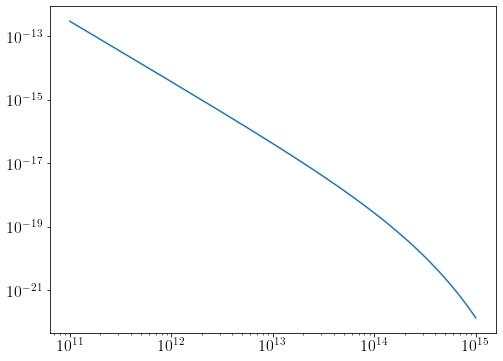

In [6]:
plt.plot(Mhod,dndm)
plt.loglog()

# np.savetxt('/Users/boris/Desktop/class_sz_m_dndm_no_spline.txt',
#            np.c_[Mhod,
#                  dndm])

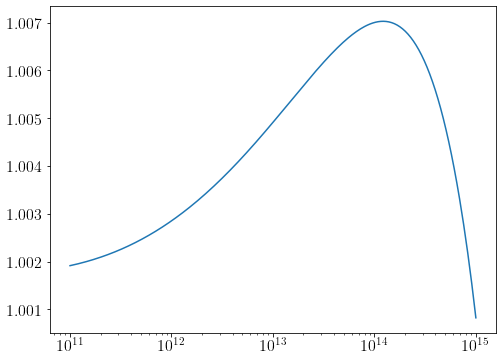

In [96]:
Mhod, dndm_no_spline = np.loadtxt('/Users/boris/Desktop/class_sz_m_dndm_no_spline.txt',
 unpack = True)

Mhod, dndm_spline = np.loadtxt('/Users/boris/Desktop/class_sz_m_dndm.txt',
 unpack = True)

plt.plot(Mhod,dndm_no_spline/dndm_spline)
plt.xscale('log')

# comparison with colossus

In [1]:
from colossus.cosmology import cosmology
from colossus.lss import mass_function

cosmology.setCosmology('WMAP9')
mfunc_so = mass_function.massFunction(1E12, 0.0, mdef = 'vir', model = 'tinker08')
mfunc_fof = mass_function.massFunction(1E12, 0.0, mdef = 'fof', model = 'watson13')

In [2]:
# mfunc_so

0.3133760780851322

In [4]:
mfunc_so = mass_function.massFunction(1E12, 0.0, mdef = '200c', model = 'tinker08')
mfunc_so


0.2834715537271783

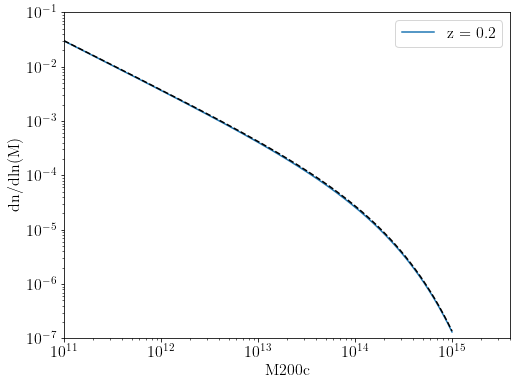

In [70]:
Mhod, dndm_no_spline = np.loadtxt('/Users/boris/Desktop/class_sz_m_dndm_no_spline.txt',
 unpack = True)
zhod = 0.199045
z = [zhod]
M = Mhod
cosmology.setCosmology('planck15');
plt.figure()
plt.xlabel('M200c')
plt.ylabel('dn/dln(M)')
plt.loglog()
plt.xlim(1E11, 4E15)
plt.ylim(1E-7, 1E-1)
for i in range(len(z)):
    mfunc = mass_function.massFunction(M, z[i], mdef = '200c', model = 'tinker08', q_out = 'dndlnM')
    plt.plot(M, mfunc, '-', label = 'z = %.1f' % (z[i]))

plt.plot(Mhod,Mhod*dndm_no_spline,c='k',ls='--')
plt.legend();

No handles with labels found to put in legend.


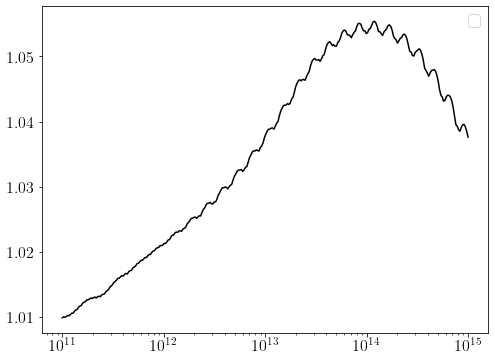

In [71]:
plt.plot(Mhod,Mhod*dndm_no_spline/mfunc,c='k')
plt.legend()
plt.xscale('log')

In [24]:
import pyccl as ccl

In [46]:
h = shivam_cosmology['h']


0.6774

In [89]:
# Cosmology
#      'h' : 0.6774,
#      'Omega_b' : 0.04860,
#      'Omega_cdm' : 0.315-0.04860,
#      'sigma8' : 0.8159,
#      'n_s' : 0.9667,
#      'N_ncdm': 1,
#      'N_ur': 2.0328,
#      'm_ncdm': 0.0

cosmo = ccl.Cosmology(Omega_c=0.315-0.04860, 
                      Omega_b=0.04860,
                      h=0.6774, 
                      A_s=2.008589e-09,
                      #A_s=2.1e-9, 
                      n_s=0.9667,
        m_nu=0,
        m_nu_type='normal',
        Neff=3.046,                     
                     )

# Array of masses
m_arr = Mhod

# Array of redshifts
z_arr = np.linspace(0.,1.,16)

In [90]:
# Delta=200 (critical).
# This one has an associated concentration-mass relation,
# so we can convert to other SO mass definitions
hmd_200c = ccl.halos.MassDef200c()

In [91]:
hmfs = []

In [99]:
# Tinker 2008 mass function
hmfs = ccl.halos.MassFuncTinker08(cosmo,mass_def=hmd_200c)

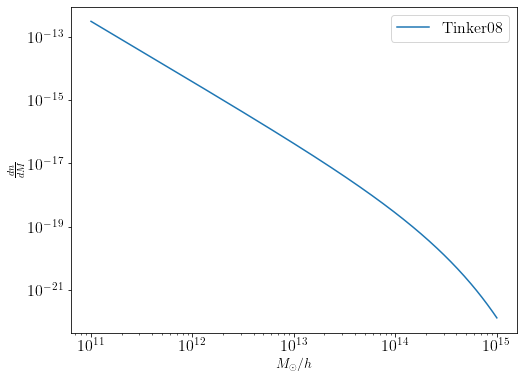

In [101]:
# Let's plot all of them at z=0
plt.figure()

nm = hmfs.get_mass_function(cosmo, m_arr/h, 1./(1.+zhod))
plt.plot(m_arr,
        nm/np.log(10)/h**3/m_arr, label=mf.name)
# plt.plot(Mhod,dndm_no_spline,c='k')
plt.loglog()
# plt.ylim([1E9,8.5E9])
plt.legend()
plt.xlabel(r'$M_\odot/h$', fontsize=14)
plt.ylabel(r'$\frac{dn}{dM}$',
           fontsize=14);

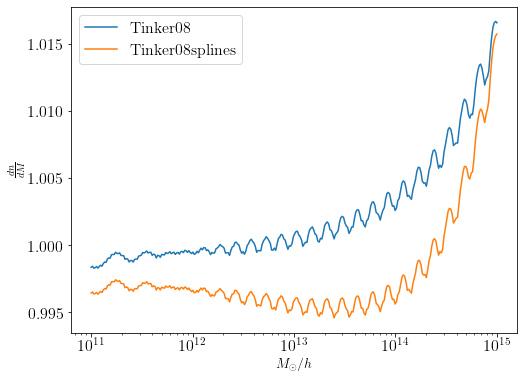

In [98]:
# Let's plot all of them at z=0
plt.figure()
for mf in hmfs:
    nm = mf.get_mass_function(cosmo, m_arr/h, 1./(1.+zhod))
    plt.plot(m_arr,
            dndm_no_spline/(nm/np.log(10)/h**3/m_arr), label=mf.name)
    plt.plot(m_arr,
            dndm_spline/(nm/np.log(10)/h**3/m_arr), label=mf.name+'splines')
# plt.plot(Mhod,dndm_no_spline,c='k')
plt.xscale('log')
# plt.ylim([1E9,8.5E9])
plt.legend()
plt.xlabel(r'$M_\odot/h$', fontsize=14)
plt.ylabel(r'$\frac{dn}{dM}$',
           fontsize=14);